# Proyecto 3 con Moving Average

1) Importación de librerías necesarias:

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime
import numpy as np
from math import *

In [72]:
#Filtro y guardo los datos en el archivo de entrenamiento hasta la fecha de febrero 2021
df4 = (df3[df3.index < "2021-03-01"])
df4.to_csv('reducido_train.csv', header=True, index=False) 
#Filtro y guardo los datos en el archivo de prueba del último mes (marzo 2021):
df5 = (df3[df3.index > "2021-02-28"]) 
df5.to_csv('reducido_test.csv', header=True, index=False)

,Close,MA_365,logPrice
time,,,
2011-12-31 08:52:00,4.39,NaN,0.642465
2012-02-23 10:48:00,4.76,NaN,0.677607
2012-04-12 17:48:00,4.85,NaN,0.685742
2012-05-15 21:54:00,4.95,NaN,0.694605
2012-06-12 21:21:00,5.66,NaN,0.752816
...,...,...,...
2021-02-26 01:59:00,46839.00,19630.069753,4.670608
2021-02-26 17:59:00,48129.89,19736.883096,4.682415
2021-02-27 10:02:00,46538.85,19839.053836,4.667816


In [2]:
df3 = pd.read_csv("reducido.csv", delimiter = ",", parse_dates=['time'], index_col='time')
df3

,Close
time,
2011-12-31 08:52:00,4.39
2012-01-22 08:52:00,6.28
2012-02-02 16:52:00,6.25
2012-02-22 00:52:00,4.58
2012-03-05 16:52:00,4.98
...,...
2021-03-27 20:44:00,55845.41
2021-03-28 13:44:00,55908.26
2021-03-29 05:44:00,55490.71


### Graficamos

<function matplotlib.pyplot.show(close=None, block=None)>

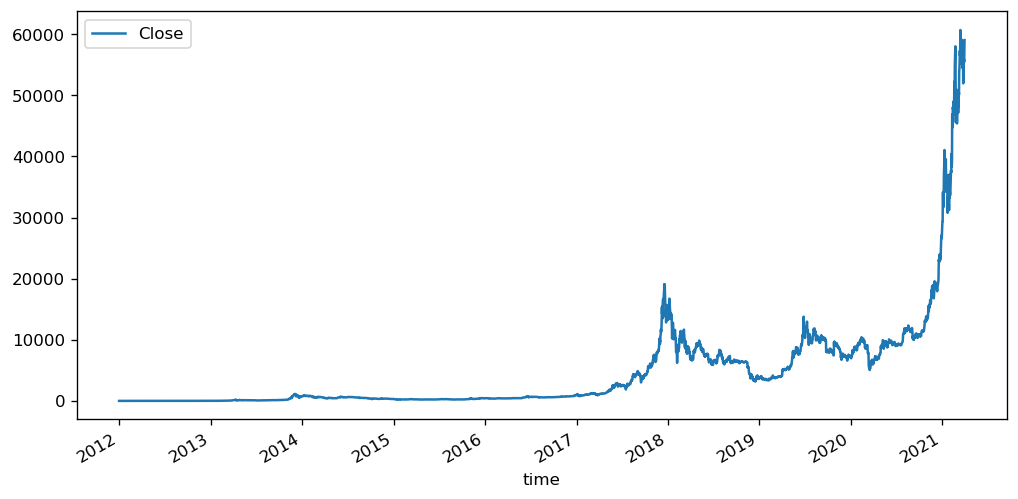

In [3]:
plt.rcParams.update({'figure.figsize': (10, 5), 'figure.dpi': 120})
df3.plot(kind='line', y='Close')
plt.show

7) Seleccionar modelo

In [4]:
from statsmodels.tsa.arima_model import ARIMA
# Crear el modelo ARIMA
model = ARIMA(df3['Close'], order=(2, 1, 2)) #hiperparámetros
model_fit = model.fit()

c:\Users\n_sar\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\Users\n_sar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

In [5]:
# Realizar la predicción
predictions = model_fit.forecast(steps=30)[0]

# Imprimir las predicciones
print(predictions)

[58569.13728001 58878.0005521  59339.72014774 58993.4605098
 58624.07258348 59060.94475197 59392.35857154 58939.70295001
 58716.69757125 59235.93642117 59408.82614529 58899.60651892
 58843.07538957 59391.98171435 59394.78464296 58883.1896574
 58995.98625512 59520.27925283 59358.80756805 58897.82918221
 59165.73892059 59615.04530441 59311.44266889 58947.58995968
 59341.20866857 59674.01428119 59264.10116019 59032.90469472
 59510.99166924 59698.57292757]


### Calcular el Moving Average

In [6]:
#Con una ventana de 365 días
df3['MA_365'] = df3['Close'].rolling(window=365).mean()


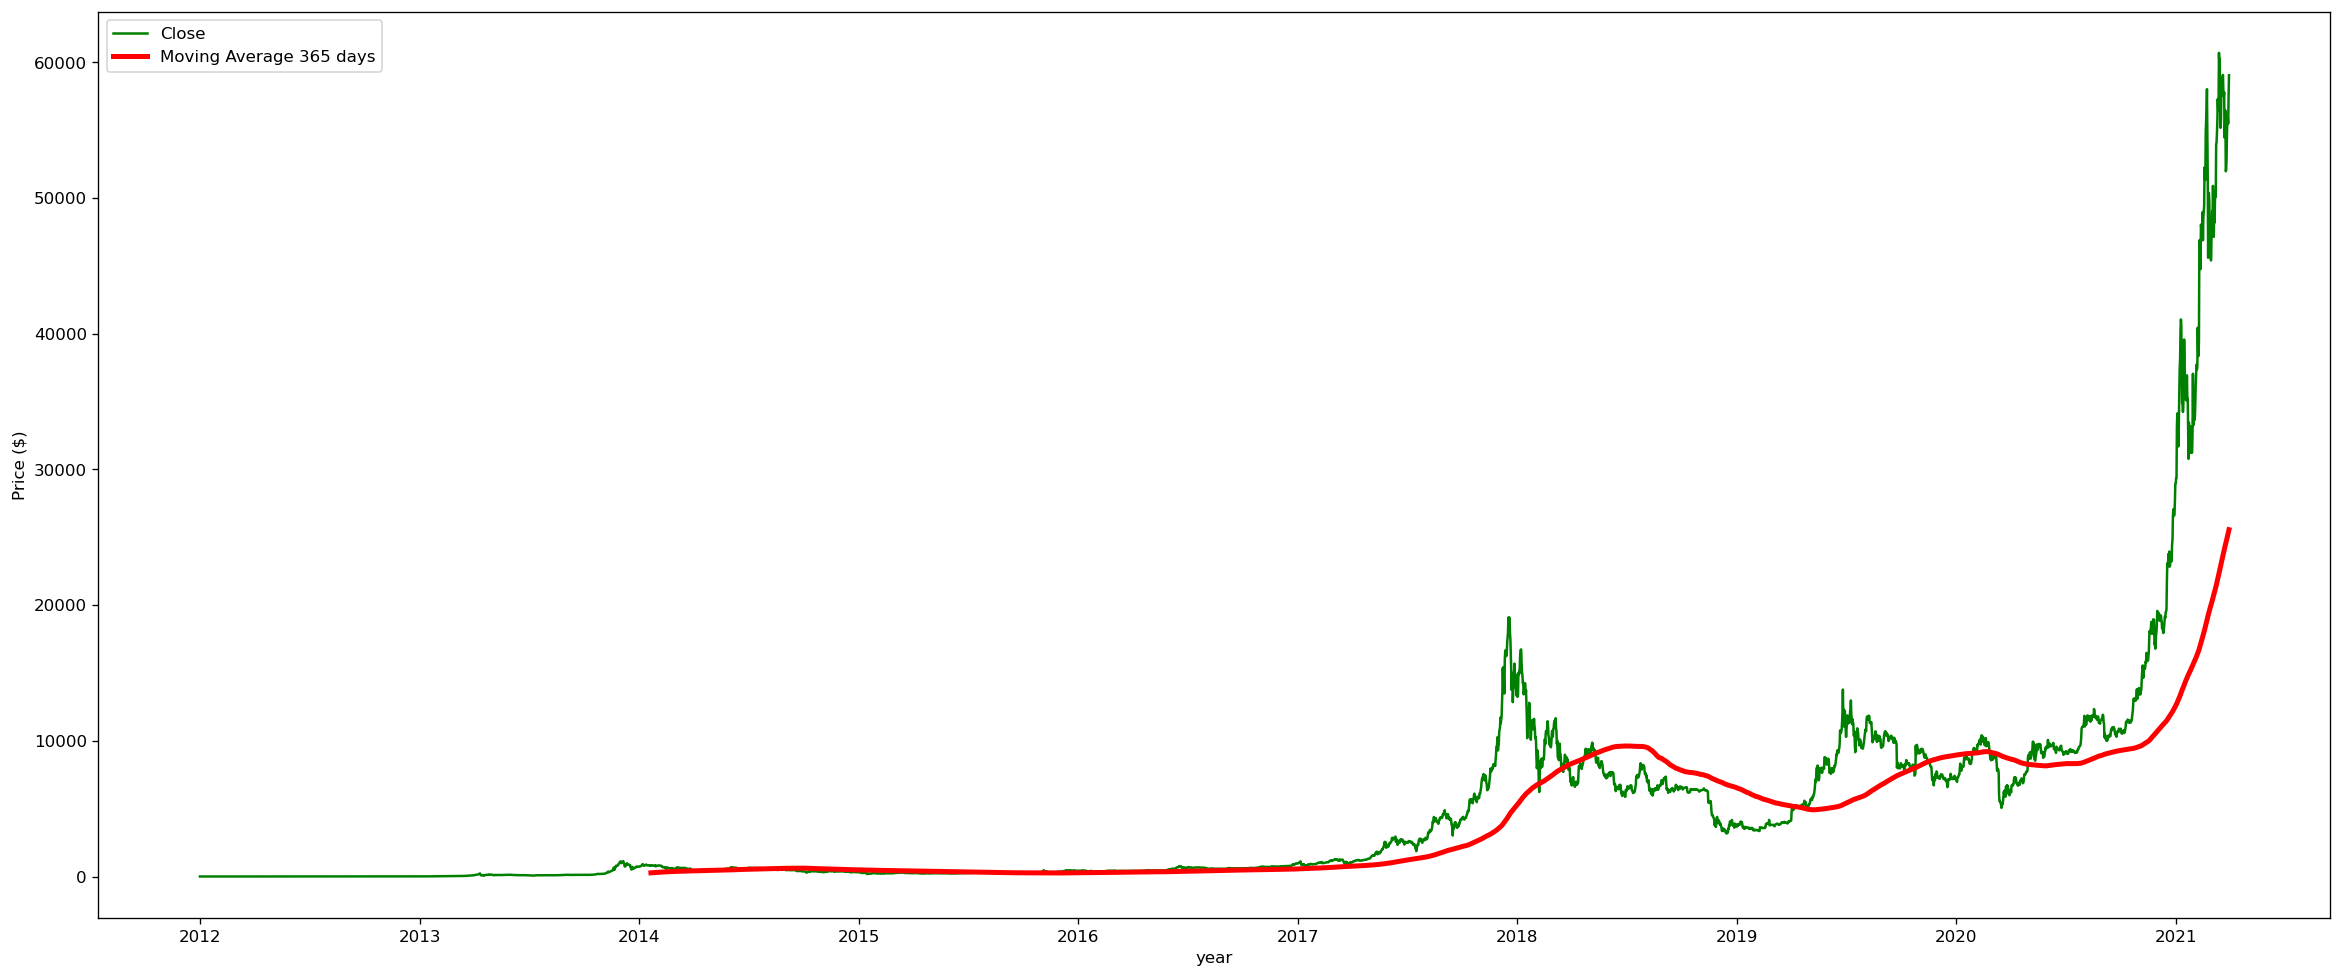

In [7]:
plt.rcParams.update({'figure.figsize': (10, 5), 'figure.dpi': 120})
# Draw it
plt.figure(figsize=(24,10))
plt.plot(df3['Close'], label = 'Close', color = 'green')
plt.plot(df3['MA_365'], label = 'Moving Average 365 days', color = 'red', linewidth=3)
plt.xlabel('year')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

9) Calcular y graficar la escala Logarítmica

In [8]:
df3["logPrice"] = df3["Close"].apply(lambda x: math.log10(x))
df3

NameError: name 'math' is not defined

AttributeError: 'DataFrame' object has no attribute 'logPrice'

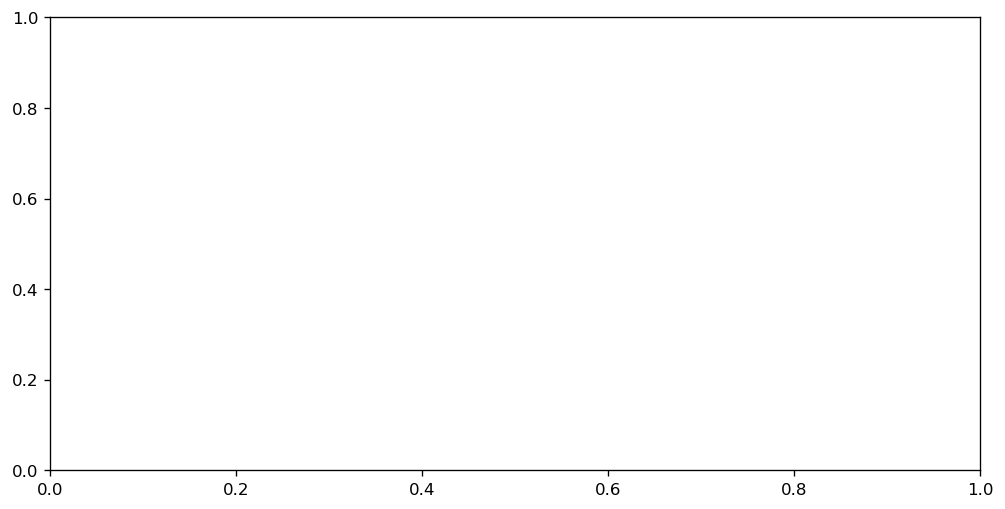

In [15]:
fig, ax = plt.subplots()
#ax.scatter(df3.index, df3.MA_365)
ax.scatter(df3.index, df3.logPrice)
#ax.plot(df3)
plt.show()

In [10]:
# dividir los datos en un conjunto de entrenamiento y un conjunto de prueba
train = df3[:int(0.8*(len(df3)))]
test = df3[int(0.8*(len(df3))):]

In [11]:
# entrenar el modelo ARIMA
model = ARIMA(train['Close'], order=(1, 0, 1))
model_fit = model.fit()

c:\Users\n_sar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


10) Entrenamiento del modelo

In [12]:
# hacer predicciones en el conjunto de prueba
predictions = model_fit.forecast(steps=len(test))[0]

In [13]:
# calcular el error de las predicciones
error = np.mean(np.abs(predictions - test['Close'].values)) / np.mean(test['Close'].values)
print('Error:', error)

Error: 0.6294847298051686


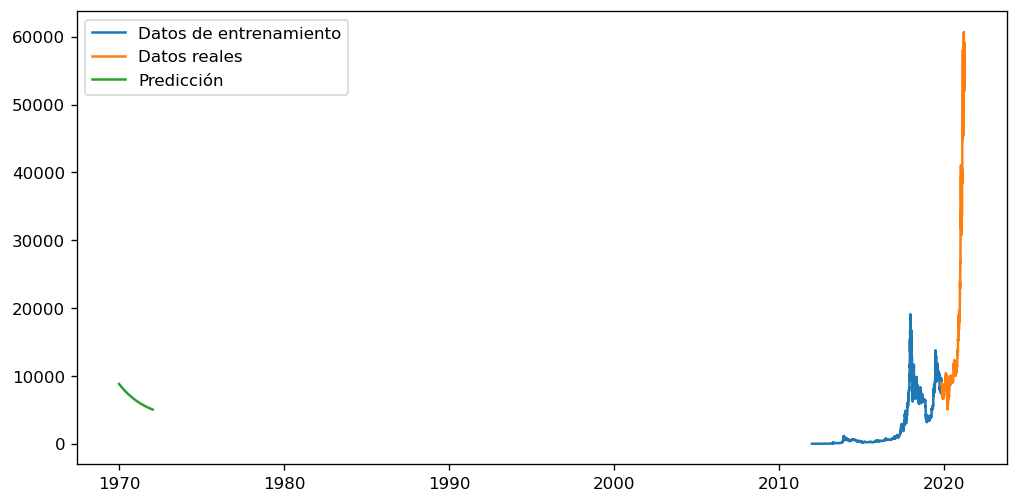

In [14]:
# visualizar los resultados
plt.plot(train['Close'], label='Datos de entrenamiento')
plt.plot(test['Close'], label='Datos reales')
plt.plot(predictions, label='Predicción')
plt.legend()
plt.show()